In [1]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma

# 워드클라우드
from wordcloud import WordCloud

In [2]:
df =pd.read_csv('./부산브이로그_유튜브.csv',encoding='utf-8')

In [3]:
df['title'].str[0:]

0      ENG) 부산여행 1박 2일로 갔다가 2.5kg 찐 썰 푼다 / 부산 맛집,핫플 뿌...
1      VLOG :: 찐부산인만 가는 현지인 부산핫플 여행 브이로그 (feat.서면편) |...
2       [vlog] 1박2일동안 갈 곳 다 가고, 먹을 거 다 먹은 3월 부산여행 브이로그🎧🌊
3      [아미로그]방탄소년단 부산콘 브이로그💜/1박 2일 부산 여행 브이로그🫶🏻/Busan...
4      [부산] 먹으러 간김에 영화제까지 보고왔습니다~^^~ 부국제 브이로그 (낙곱새, 밀...
                             ...                        
798                          LIBRARY VLOG📚*친구들과 도서관 브이로그
799    Good News 👶🏻 | প্রথম বার আমাদের Baby কে দেখলাম...
800    নতুন বাড়িতে নতুন চশমা পরে নতুন দরজা কিনলাম,আজ...
801    영화전공 부산국제영화제 브이로그 | BIFF VLOG | 양조위 배우 1열에서 봄(...
802                                                video
Name: title, Length: 803, dtype: object

In [4]:
df['title']= df['title'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df['title']=df["title"].map(lambda x : (re.sub(' +', ' ', x)))

In [5]:
df

,title
0,ENG 부산여행 1박 2일로 갔다가 2 5kg 찐 썰 푼다 부산 맛집 핫플 뿌시기 ...
1,VLOG 찐부산인만 가는 현지인 부산핫플 여행 브이로그 feat 서면편 서면 나이대...
2,vlog 1박2일동안 갈 곳 다 가고 먹을 거 다 먹은 3월 부산여행 브이로그
3,아미로그 방탄소년단 부산콘 브이로그 1박 2일 부산 여행 브이로그 Busan co...
4,부산 먹으러 간김에 영화제까지 보고왔습니다 부국제 브이로그 낙곱새 밀면 꼬김밥 국...
...,...
798,LIBRARY VLOG 친구들과 도서관 브이로그
799,Good News প রথম ব র আম দ র Baby ক দ খল ম Baby ...
800,নত ন ব ড ত নত ন চশম পর নত ন দরজ ক নল ম আজ মনট ...
801,영화전공 부산국제영화제 브이로그 BIFF VLOG 양조위 배우 1열에서 봄 오픈토크...


In [6]:
df['title'].to_csv('./부산브이로그_split.csv',encoding='utf-8',index=False)

In [7]:
df['title'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,ENG,부산여행,1박,2일로,갔다가,2,5kg,찐,썰,푼다,...,브라켓테이블,네살차이,스스키노,None,None,None,None,None,None,None
1,VLOG,찐부산인만,가는,현지인,부산핫플,여행,브이로그,feat,서면편,서면,...,None,None,None,None,None,None,None,None,None,None
2,,vlog,1박2일동안,갈,곳,다,가고,먹을,거,다,...,None,None,None,None,None,None,None,None,None,None
3,,아미로그,방탄소년단,부산콘,브이로그,1박,2일,부산,여행,브이로그,...,None,None,None,None,None,None,None,None,None,None
4,,부산,먹으러,간김에,영화제까지,보고왔습니다,부국제,브이로그,낙곱새,밀면,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,LIBRARY,VLOG,친구들과,도서관,브이로그,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
799,Good,News,প,রথম,ব,র,আম,দ,র,Baby,...,য,চ,ছ,,None,None,None,None,None,None
800,নত,ন,ব,ড,ত,নত,ন,চশম,পর,নত,...,খ,শ,,None,None,None,None,None,None,None
801,영화전공,부산국제영화제,브이로그,BIFF,VLOG,양조위,배우,1열에서,봄,오픈토크,...,None,None,None,None,None,None,None,None,None,None


In [8]:
# 파일로드
data = pd.read_csv('./부산브이로그_split.csv',encoding='utf-8')
data = data['title']

In [9]:
data

0      ENG 부산여행 1박 2일로 갔다가 2 5kg 찐 썰 푼다 부산 맛집 핫플 뿌시기 ...
1      VLOG 찐부산인만 가는 현지인 부산핫플 여행 브이로그 feat 서면편 서면 나이대...
2           vlog 1박2일동안 갈 곳 다 가고 먹을 거 다 먹은 3월 부산여행 브이로그 
3       아미로그 방탄소년단 부산콘 브이로그 1박 2일 부산 여행 브이로그 Busan co...
4       부산 먹으러 간김에 영화제까지 보고왔습니다 부국제 브이로그 낙곱새 밀면 꼬김밥 국...
                             ...                        
798                           LIBRARY VLOG 친구들과 도서관 브이로그
799    Good News প রথম ব র আম দ র Baby ক দ খল ম Baby ...
800    নত ন ব ড ত নত ন চশম পর নত ন দরজ ক নল ম আজ মনট ...
801    영화전공 부산국제영화제 브이로그 BIFF VLOG 양조위 배우 1열에서 봄 오픈토크...
802                                                video
Name: title, Length: 803, dtype: object

In [10]:
# 데이터가져오기
f = open("./부산브이로그_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [11]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [12]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [13]:
#많이 나온 단어 상위백개
korean = pd.Series(final_result).value_counts(ascending=False).head(100)
print('키워드')
print(korean)
print(korean)

키워드
부산      963
로그      819
브이      783
여행      325
맛집      219
       ... 
영상       10
대구       10
쇼핑       10
웨딩촬영     10
가성       10
Length: 100, dtype: int64


In [14]:
count_data = korean.to_dict()

In [15]:
from collections import Counter


count = Counter(count_data)

In [16]:
count

Counter({'부산': 963,
         '로그': 819,
         '브이': 783,
         '여행': 325,
         '맛집': 219,
         '부산여행': 200,
         '해운대': 186,
         '광안': 185,
         '카페': 160,
         '일상': 93,
         '박일': 91,
         '투어': 79,
         '추천': 69,
         '먹방': 61,
         '서면': 53,
         '마을': 53,
         '콘서트': 52,
         '문화': 48,
         '흰여울': 47,
         '요트': 47,
         '기장': 46,
         '캡슐': 45,
         '호텔': 44,
         '혼자': 41,
         '뚜벅': 41,
         '아미': 40,
         '스카이': 38,
         '롯데': 38,
         '돼지국밥': 36,
         '친구': 36,
         '코스': 36,
         '소품': 36,
         '운전': 35,
         '당일치기': 34,
         '월드': 34,
         '해리': 32,
         '숙소': 31,
         '영도': 30,
         '밀면': 28,
         '떡볶이': 28,
         '방탄소년단': 26,
         '커플': 24,
         '커피': 24,
         '예고': 24,
         '오션': 23,
         '열차': 23,
         '시장': 23,
         '바다': 22,
         '우정': 21,
         '거리': 21,
         '인생': 20,
        

In [17]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

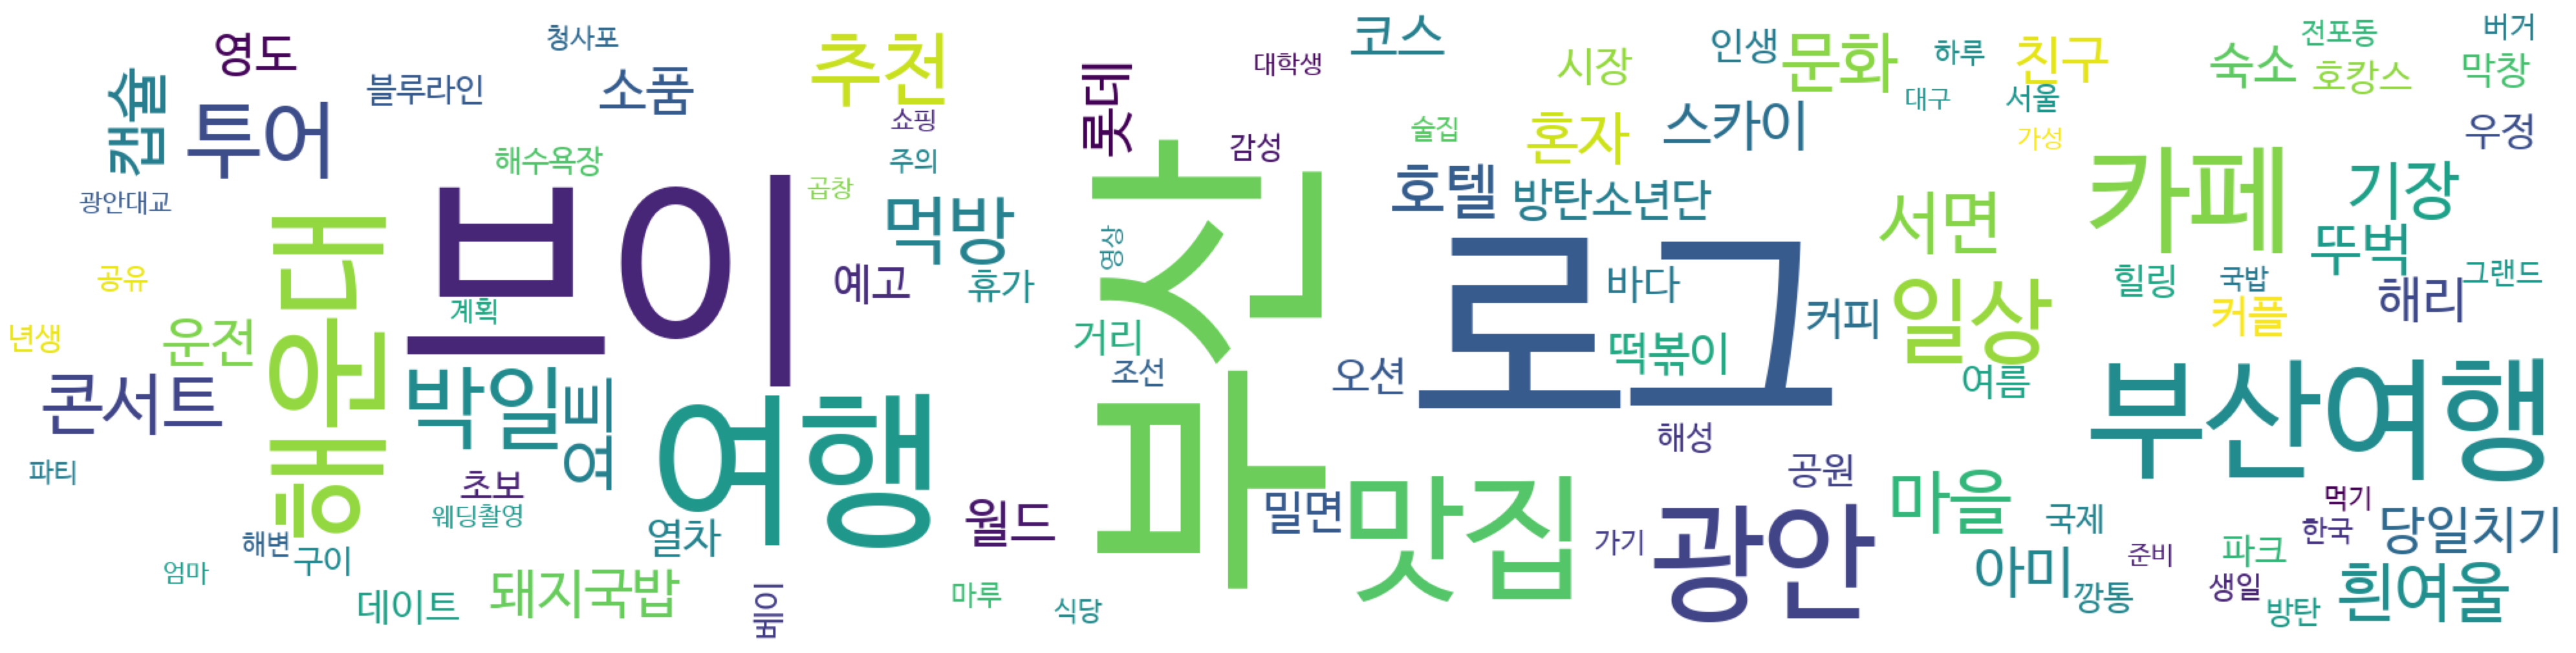

In [18]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()